# Holberg
This notebook tries to recreate the N-body simulation of Erik Holmberg. In 1941 he used light bulbs to simulate the gravitational interaction of stars within two colliding galaxies. The paper can be found on [ADS](http://adsabs.harvard.edu/abs/1941ApJ....94..385H).

Here, we use REBOUND instead of lightbulbs.

In [1]:
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First, we setup the initial conditions. The velocities are chosen such that the particles are initially on approximately circular orbits.

In [2]:
sim = rebound.Simulation()
sim.add(m=1)

for i in range(6):
    a = 1.
    m = 1.
    v = np.sqrt(4.1/2.)
    x  =  a*np.sin(float(i)/6.*2.*np.pi)
    y  =  a*np.cos(float(i)/6.*2.*np.pi)
    vx =  v*np.cos(float(i)/6.*2.*np.pi)
    vy = -v*np.sin(float(i)/6.*2.*np.pi)
    sim.add(m=m,x=x,y=y,vx=vx,vy=vy)
    
for i in range(8):
    a = 2.
    m = 1.
    v = np.sqrt(9.0/2.)
    x = a*np.sin(float(i)/8.*2.*np.pi)
    y = a*np.cos(float(i)/8.*2.*np.pi)
    vx =  v*np.cos(float(i)/8.*2.*np.pi)
    vy = -v*np.sin(float(i)/8.*2.*np.pi)
    sim.add(m=m,x=x,y=y,vx=vx,vy=vy)

for i in range(10):
    a = 3.
    m = 0.7
    v = np.sqrt(15.0/2.)
    x = a*np.sin(float(i)/10.*2.*np.pi)
    y = a*np.cos(float(i)/10.*2.*np.pi)
    vx =  v*np.cos(float(i)/10.*2.*np.pi)
    vy = -v*np.sin(float(i)/10.*2.*np.pi)    
    sim.add(m=m,x=x,y=y,vx=vx,vy=vy)

for i in range(12):
    a = 4.
    m = 0.3
    v = np.sqrt(16.0/2.)
    x = a*np.sin(float(i)/12.*2.*np.pi)
    y = a*np.cos(float(i)/12.*2.*np.pi)
    vx =  v*np.cos(float(i)/12.*2.*np.pi)
    vy = -v*np.sin(float(i)/12.*2.*np.pi)    
    sim.add(m=m,x=x,y=y,vx=vx,vy=vy)

Next, let's run the simulation and take snapshots of the particle positions and velocities at 9 intervals.

In [3]:
N = 9
xy = np.zeros((N,sim.N,4))
times = np.linspace(0,5.,N)
ps = sim.particles
for i,t in enumerate(times):
    sim.integrate(t)
    for j, p in enumerate(ps):
        xy[i][j] = (p.x,p.y,p.vx,p.vy)

Finally, let's plot the results.

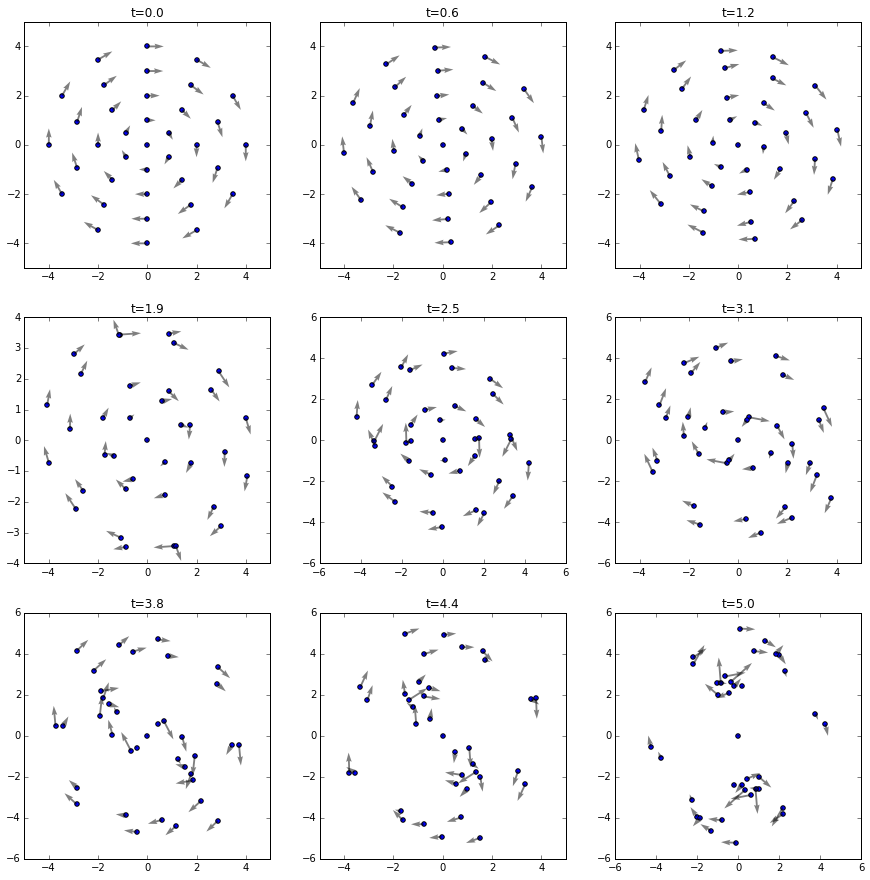

In [4]:
f, axarr = plt.subplots(3, 3, figsize=(15,15))
for i,axs in enumerate(axarr):
    for j,ax in enumerate(axs):
        ax.scatter(xy[i*3+j,:,0],xy[i*3+j,:,1])
        ax.quiver(xy[i*3+j,:,0],xy[i*3+j,:,1],xy[i*3+j,:,2],xy[i*3+j,:,3], alpha=0.5)
        ax.set_title("t=%.1f"%(times[i*3+j]))